In [1]:
!pip install librosa

In [3]:
!pip install librosa --upgrade

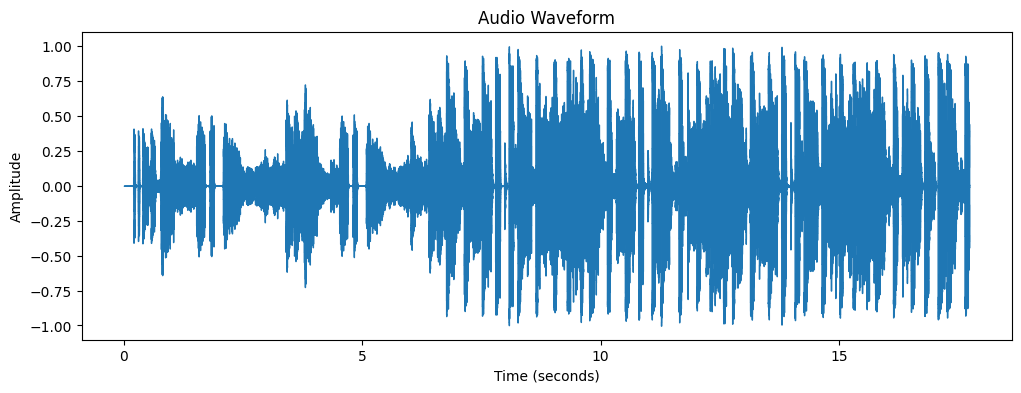

In [4]:


import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Load the audio file
audio_path = '/content/all-my-fellas.mp3'
y, sr = librosa.load(audio_path, sr=None)  # 'sr=None' loads the file in its original sampling rate

# Plot the audio waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Play the audio
Audio(audio_path)


In [5]:
!pip install transformers torchaudio

In [6]:
from transformers import Wav2Vec2Model, Wav2Vec2Processor
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [12]:
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2Model
import torchaudio

# Load the pre-trained audio model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Load and preprocess the audio file
audio_path = '/content/all-my-fellas.mp3'
waveform, sample_rate = torchaudio.load(audio_path)

# Resample the audio to 16 kHz if necessary
if sample_rate != 16000:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
    waveform = resampler(waveform)

# Ensure the audio is mono (single channel)
if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0)

# Process the waveform with the processor
input_values = processor(waveform, sampling_rate=16000, return_tensors="pt").input_values

# Remove extra dimensions if present
if input_values.ndim > 2:
    input_values = input_values.squeeze(0)

# Generate embeddings
with torch.no_grad():
    embeddings = model(input_values).last_hidden_state

# embeddings now contain the audio features from the model

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
with torch.no_grad():
    embeddings = model(input_values).last_hidden_state

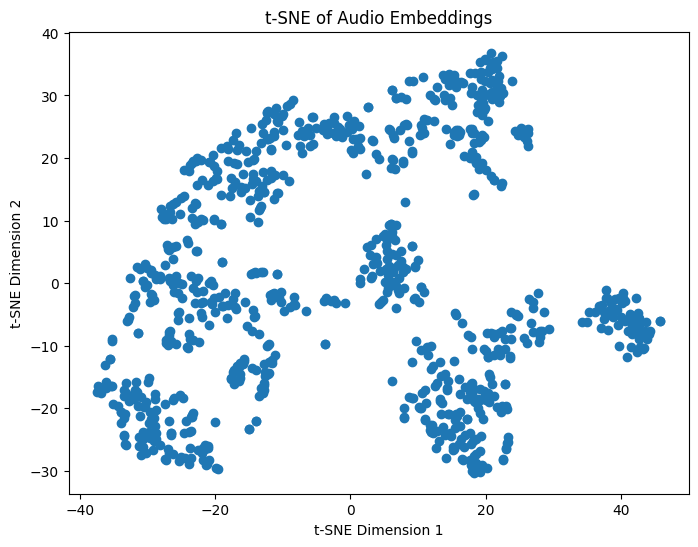

In [14]:
from sklearn.manifold import TSNE

# Perform t-SNE on the embeddings
tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings_tsne = tsne.fit_transform(embeddings.squeeze().numpy())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])
plt.title('t-SNE of Audio Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()